In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"
InteractiveShell.ast_node_interactivity="last"

# Seaborn

- https://seaborn.pydata.org/
- matplotlib의 기능에 스타일을 확장한 파이썬 시각화 도구
- high-level interface
- 패키지는 설치해야 함(pip install seaborn)
    - 아나콘다에 seaborn 패키지 포함되어 있으므로 이미 설치되어 있음
- seaborn을 사용하기 위해서는 matplotlib가 import 되어 있어야 함

## 패키지 임포트

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 한글 폰트 지원
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 지원되는 플롯 유형

- Relational plots
- Distribution plots
- Categorical plots
- Regression plots
- Multi-plot grids
- Figure theming
- Color palettes


- https://seaborn.pydata.org/examples/index.html
- https://seaborn.pydata.org/tutorial.html

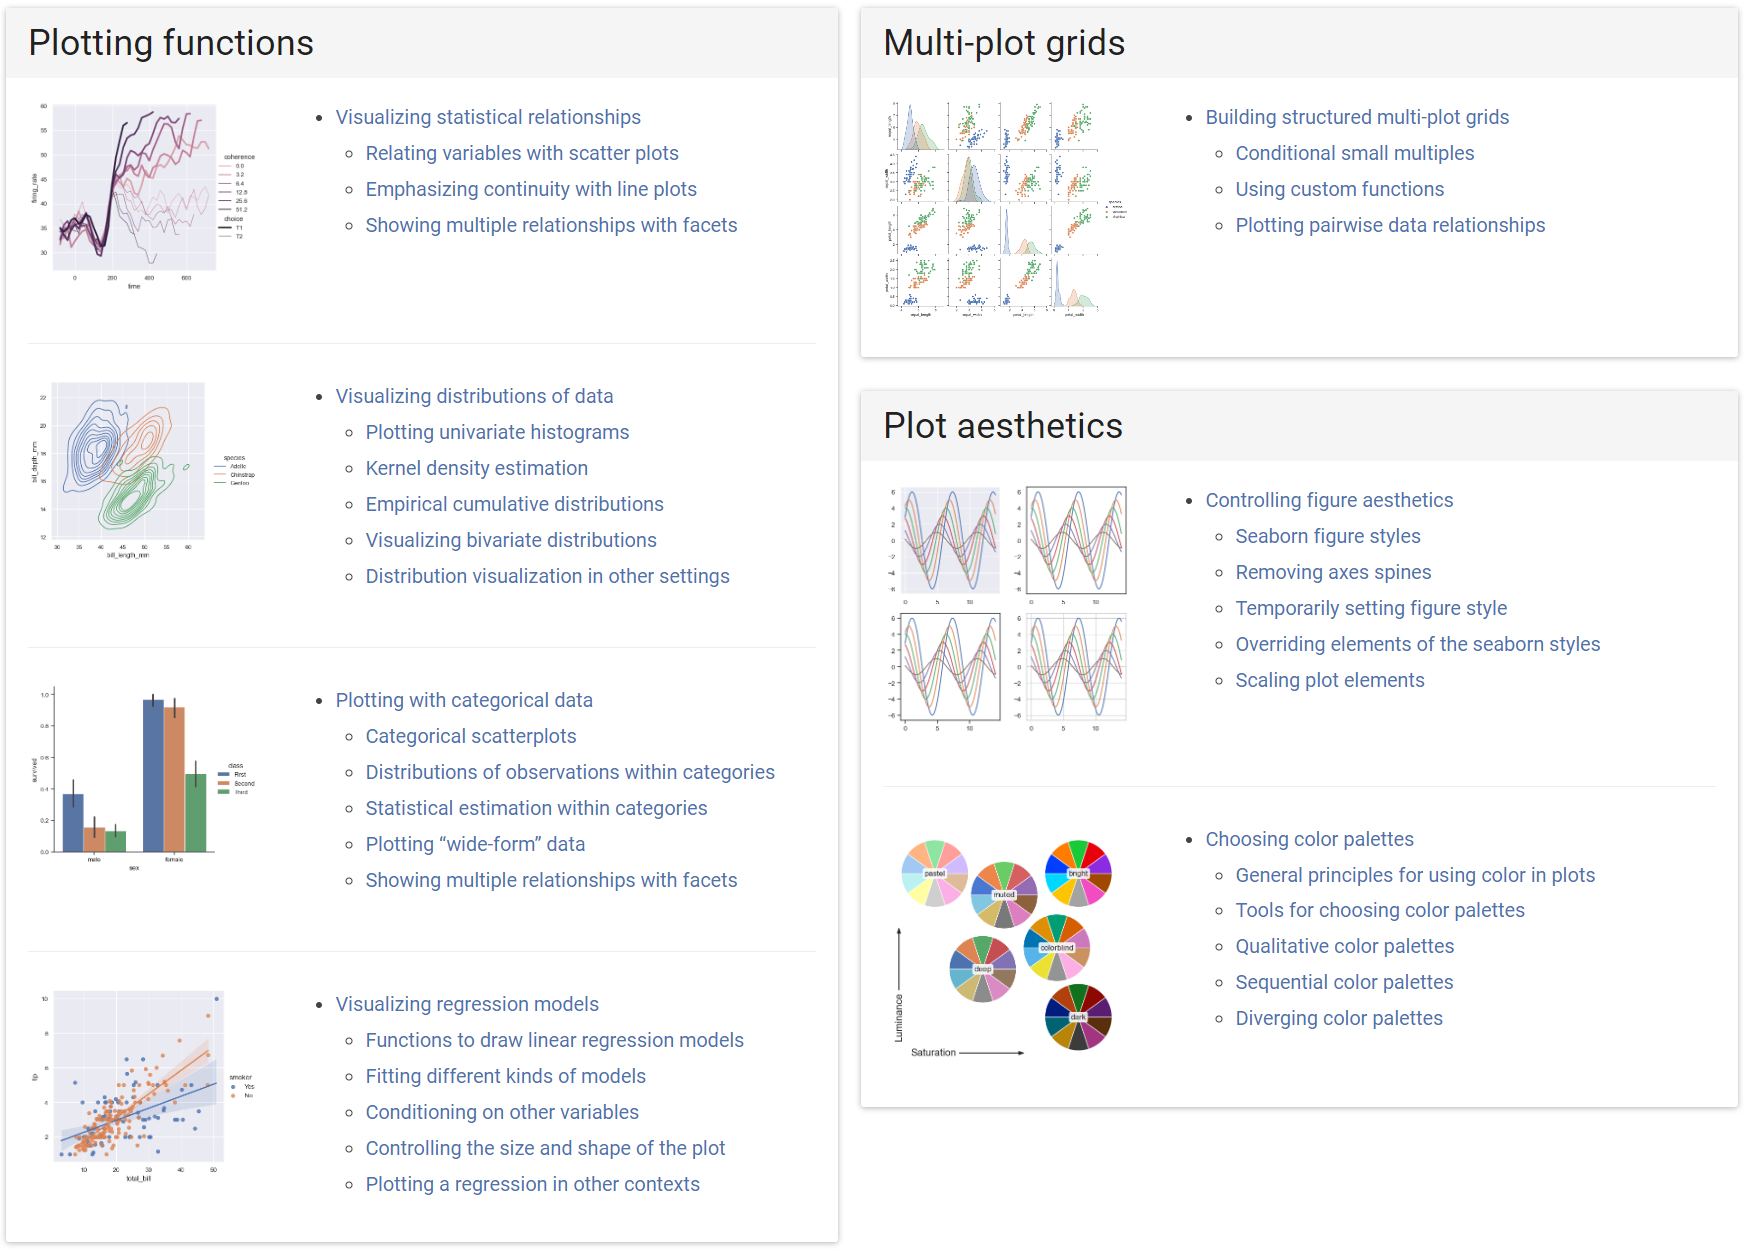

#### 데이터 시각화(visualization)

- 데이터를 보기 쉽게 그림으로 표현한 것이 그래프(graph)
- 데이터의 변수의 수, 종류, 분석 목적에 따라 시각화 도구가 달라짐

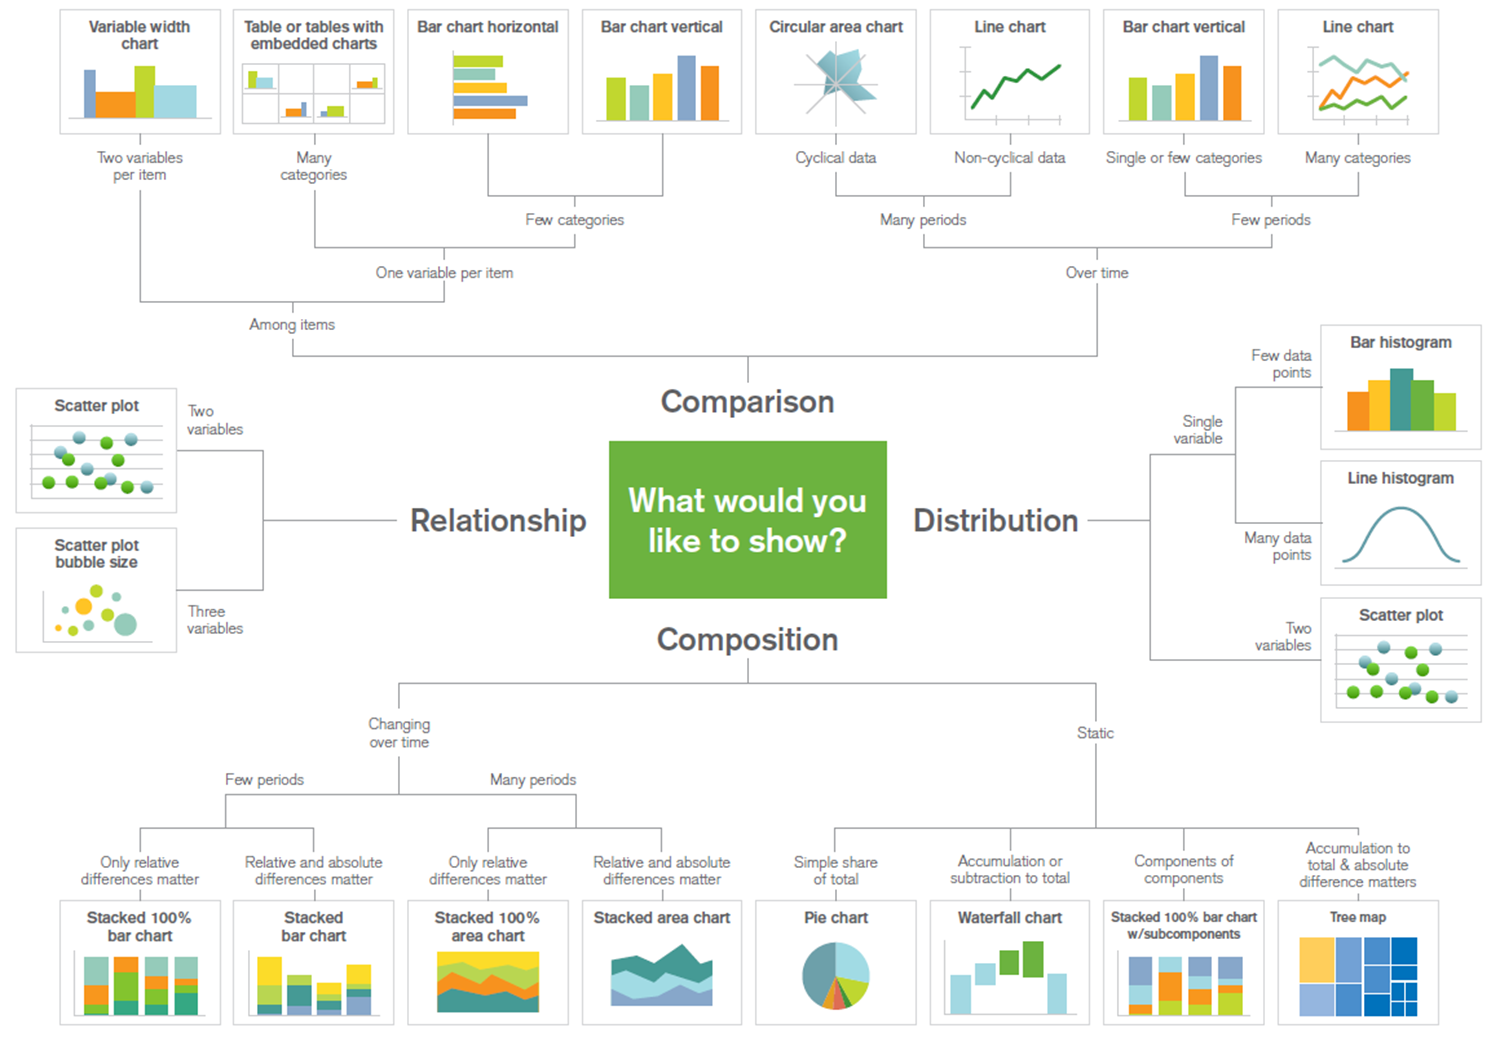

출처: https://blog.qlik.com/third-pillar-of-mapping-data-to-visualizations-usage

------------------------

# 시각화의 목적에 따른 플롯

## 1. 데이터 분포(distribution) 파악

- 데이터의 중심(대표), 산포(퍼짐), 왜도, 첨도 등의 분포 특징을 파악하기 위해 사용


- 히스토그램(histogram)
    - matplotlib.pyplot.hist()
    - seaborn.displot(kind='hist')
    - seaborn.histplot()
    - DataFrame.plot(kind='hist')
    - DataFrame.plot.hist()
    

- 박스플롯(boxplot)
    - matplotlib.pyplot.boxplot()
    - seaborn.boxplot()
    - DataFrame.plot(kind='box')
    - DataFrame.plot.box()
    - DataFrame.boxplot()
    
    
- 커널 밀도 곡선(Kernel Density Estimation plot)
    - seaborn.displot(kind='kde')
    - seaborn.kdeplot()
    - DataFrame.plot(kind='kde')
    - DataFrame.plot.kde()

#### 예제 데이터. iris dataset

In [5]:
iris = sns.load_dataset('iris')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1) 히스토그램(histogram)

- 표로 되어 있는 도수 분포를 그림으로 나타낸 것
- 계급구간, 계급값, 빈도, 상대빈도

### ① matplotlib.pyplot의 히스토그램 함수 hist()

- 형식 : hist(x, bins=None, range=None, density=False, cumultive=False, ...)
- 반환값 :
    - n : 히스토그램의 bin(계급구간) 수
    - bins : 계급구간 경계값들, 계급수+1 개
    - patches : 


- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

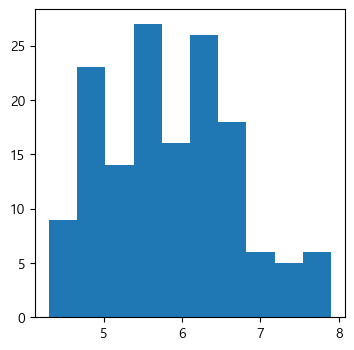

In [11]:
plt.figure(figsize=(4,4))
plt.hist(iris.sepal_length)
plt.show()

#### 히스토그램 객체 반환값
- 계급구간별 관측치 개수, 계급구간(bin)범위, patch 객체 반환

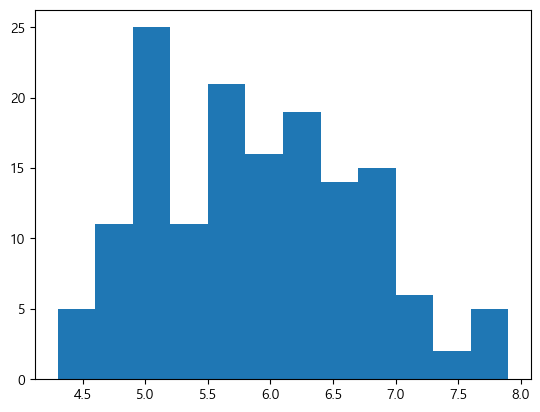

In [13]:
n, bins, patches = plt.hist(iris.sepal_length, bins=12)

In [14]:
print(n, bins, patches)

[ 5. 11. 25. 11. 21. 16. 19. 14. 15.  6.  2.  5.] [4.3 4.6 4.9 5.2 5.5 5.8 6.1 6.4 6.7 7.  7.3 7.6 7.9] <BarContainer object of 12 artists>


(array([24., 26.,  0.,  0.,  3.,  8., 18., 25., 18., 17.,  7.,  4.]),
 array([1.        , 1.49166667, 1.98333333, 2.475     , 2.96666667,
        3.45833333, 3.95      , 4.44166667, 4.93333333, 5.425     ,
        5.91666667, 6.40833333, 6.9       ]),
 <BarContainer object of 12 artists>)

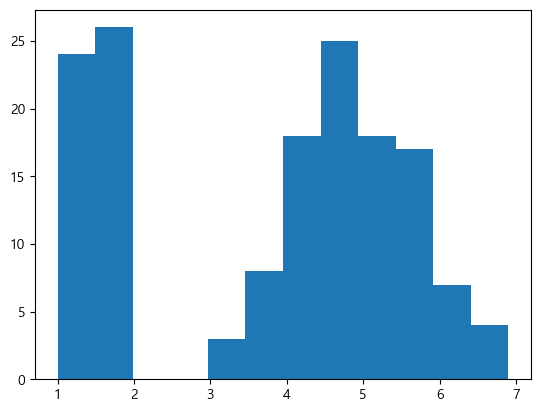

In [15]:
plt.hist(iris.petal_length, bins=12)

#### hist()의 density 인수
- density =  True : y축을 빈도수(frequency)가 아니라 상대빈도(비율)로 지정

(array([0.16666667, 0.42592593, 0.25925926, 0.5       , 0.2962963 ,
        0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

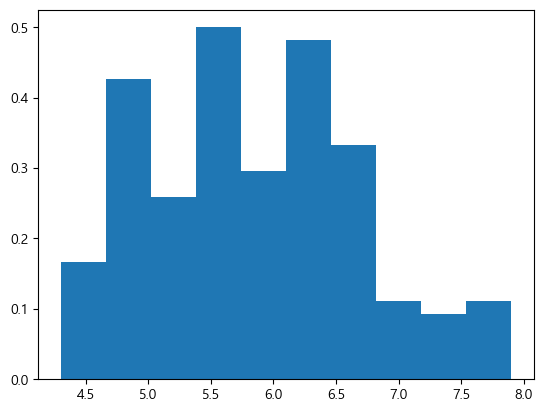

In [16]:
plt.hist(iris.sepal_length, density=True)

#### 히스토그램의 색깔 및 투명도 지정 인수 : facecolor, alpha
- facecolor = 'blue'
- alpha(투명도) : 0~1 사이의 값, 0에 가까워질수록 투명해짐 

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

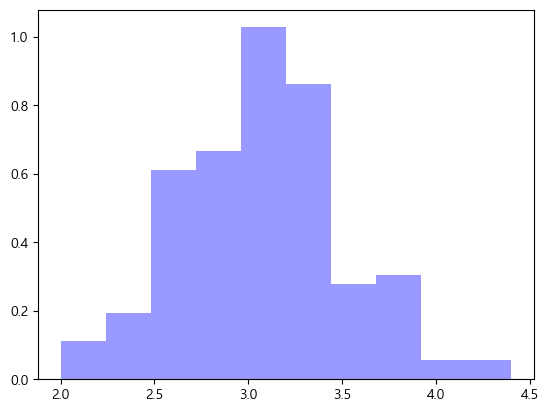

In [18]:
plt.hist(iris.sepal_width, density=True, 
         facecolor='blue', alpha=0.4)

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

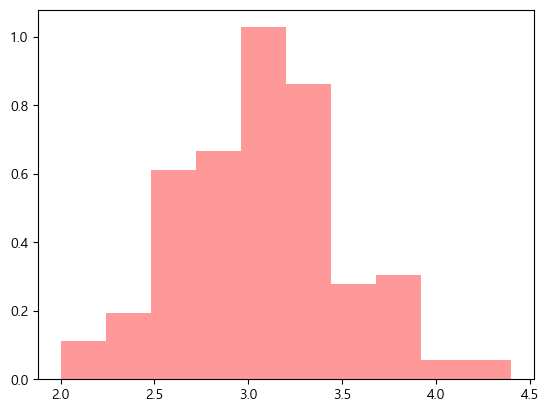

In [19]:
plt.hist(iris.sepal_width, density=True, 
         facecolor='red', alpha=0.4)
plt.show()

#### 플롯의 제목, 축제목, 축범위 등의 지정
- 플롯의 제목, 축제목 표시

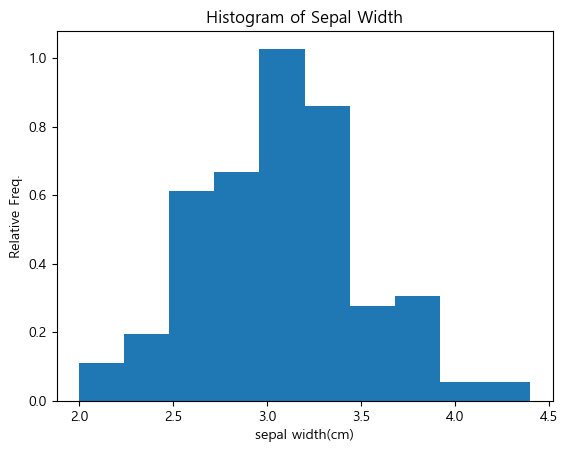

In [20]:
plt.title('Histogram of Sepal Width')
plt.hist(iris.sepal_width, density=True)
plt.xlabel('sepal width(cm)')
plt.ylabel('Density.')
plt.show()

- 플롯의 x축, y축 값 변경, 그리드 표시

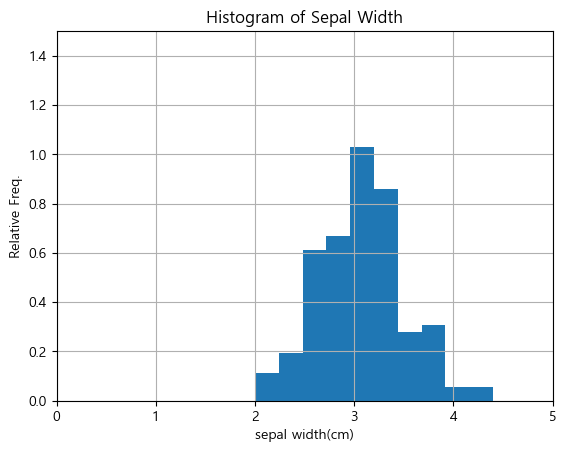

In [24]:
plt.title('Histogram of Sepal Width')
plt.hist(iris.sepal_width, density=True)
plt.xlabel('sepal width(cm)')
plt.ylabel('Density.')
plt.xlim(0,5)
plt.ylim(0,1.5)
plt.grid()
plt.show()

- x축, y축 범위 한꺼번에 지정 : axis([x_하한, x_상한, y_하한, y_상한])  

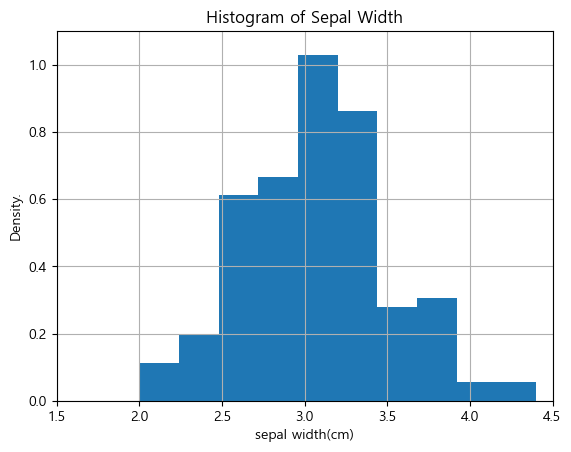

In [42]:
plt.title('Histogram of Sepal Width')
n, bins, patches = plt.hist(iris.sepal_width, density=True)
plt.xlabel('sepal width(cm)')
plt.ylabel('Density.')
plt.axis([1.5, 4.5, 0, 1.1])
plt.grid()

In [41]:
s = n*0.24
s.sum()

0.9999999999999996

In [43]:
bins

array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ])

### ② seaborn의 히스토그램 함수

- 형식1.
    - seaborn.histplot(data, x, y, hue, weights, stat, bins, binwidth, kde, ...)
    - 반환 : ax
    - https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot


- 형식2.
    - displot(kind='hist', x, y, data, hue,...)
    - https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

In [30]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### sns.histplot()

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

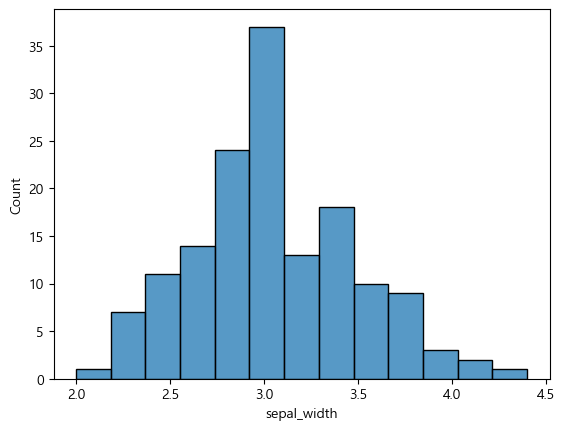

In [31]:
sns.histplot(data=iris, x='sepal_width')

<AxesSubplot:xlabel='Count', ylabel='sepal_length'>

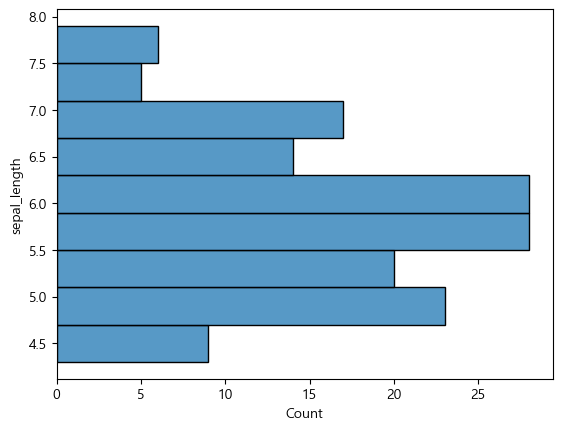

In [33]:
sns.histplot(data=iris, y='sepal_length')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

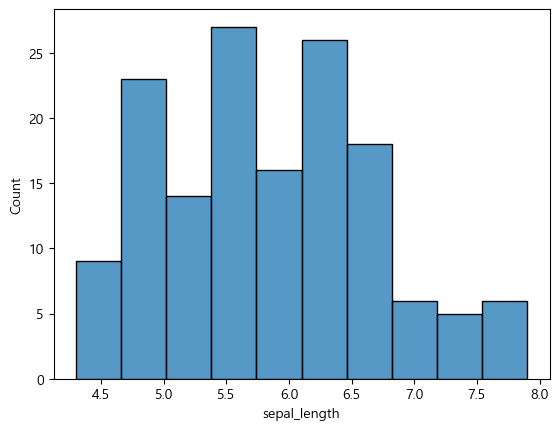

In [34]:
sns.histplot(data=iris, x='sepal_length', bins=10)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

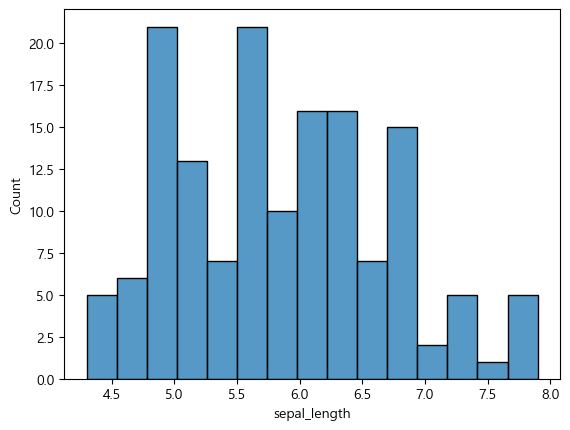

In [36]:
sns.histplot(data=iris, x='sepal_length', bins=15)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

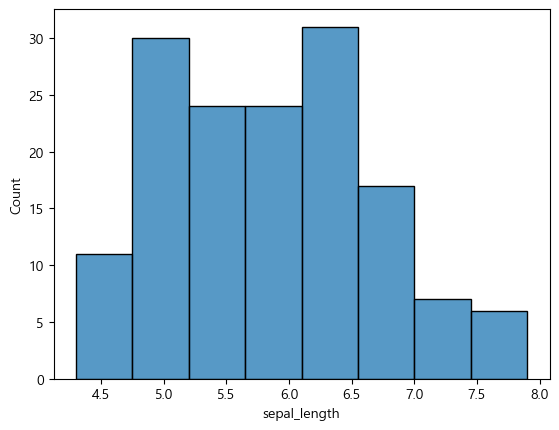

In [37]:
sns.histplot(data=iris, x='sepal_length', bins=8)

#### sns.histplot()의 stat인수

- stat='count' : 각 빈의 관측값수
- stat='frequency' : 각 빈의 너비로 나눈 관측값수
- stat='probability' or 'proportion' : 막대 높이의 합이 1이 되도록 정규화
- stat='percent' : 막대 높이 합이 100이 되도록 정규화
- stat='density' : 히스토그램의 전체 면적이 1이 되도록 정규화

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

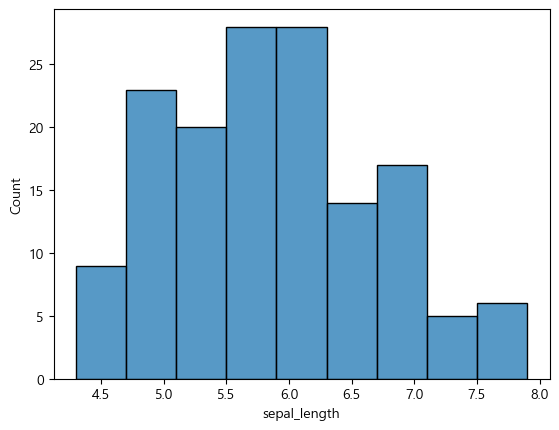

In [45]:
# 디폴트값 : count
sns.histplot(data=iris, x='sepal_length', stat='count')

<AxesSubplot:xlabel='sepal_length', ylabel='Frequency'>

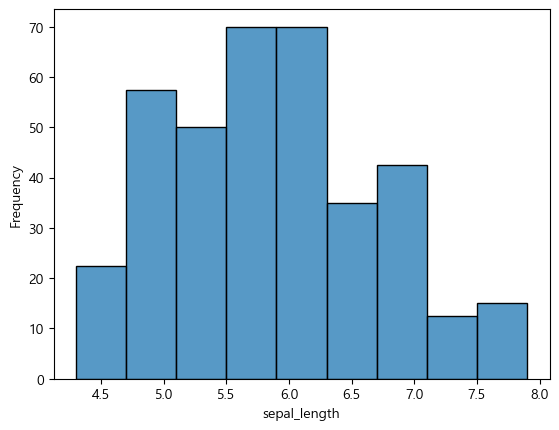

In [44]:
sns.histplot(data=iris, x='sepal_length', stat='frequency')

<AxesSubplot:xlabel='sepal_length', ylabel='Probability'>

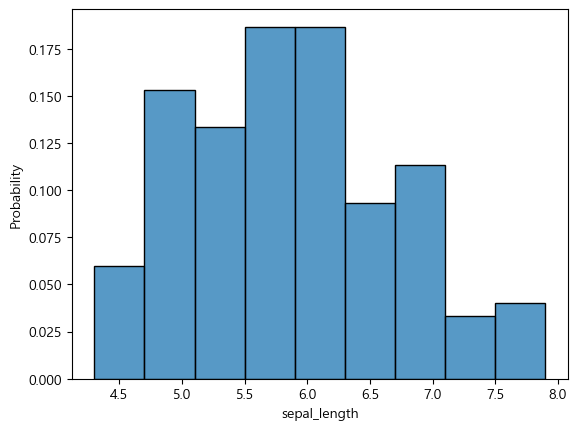

In [48]:
sns.histplot(data=iris, x='sepal_length', stat='probability')

<AxesSubplot:xlabel='sepal_length', ylabel='Percent'>

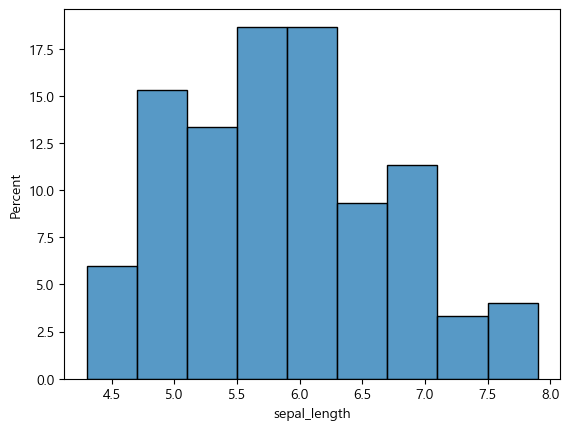

In [46]:
sns.histplot(data=iris, x='sepal_length', stat='percent')

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

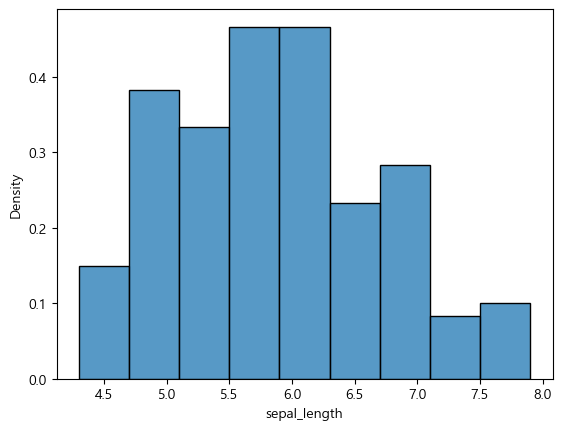

In [47]:
sns.histplot(data=iris, x='sepal_length', stat='density')

#### sns.histplot(kde=True) 사용하여 커널 밀도 함수 곡선 그리기 
- 커널밀도곡선(Kernel Density Estimation curve)을 히스토그램 위에 그림

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

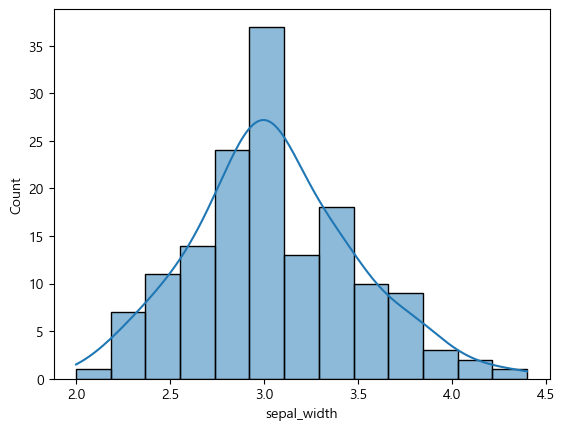

In [49]:
sns.histplot(data=iris, x='sepal_width', kde=True)

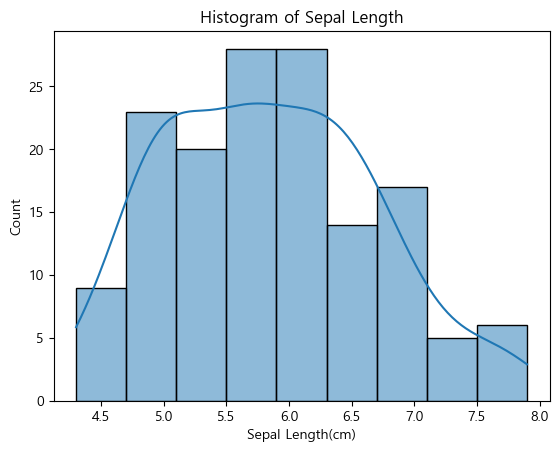

In [51]:
ax = sns.histplot(data=iris, x='sepal_length', kde=True)
ax.set_title('Histogram of Sepal Length')
ax.set_xlabel('Sepal Length(cm)')
plt.show()

#### sns.histplot()의 cumulative인수

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

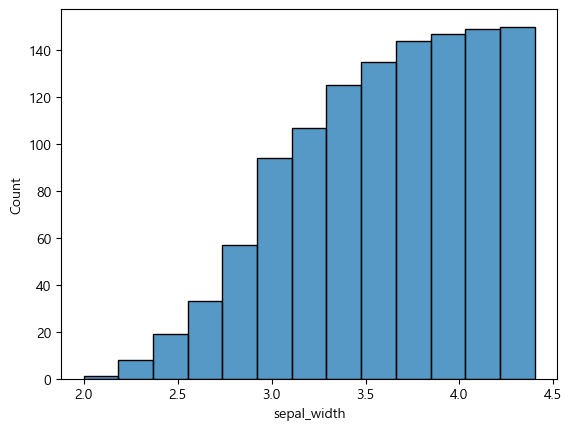

In [52]:
sns.histplot(data=iris, x='sepal_width', cumulative=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Frequency'>

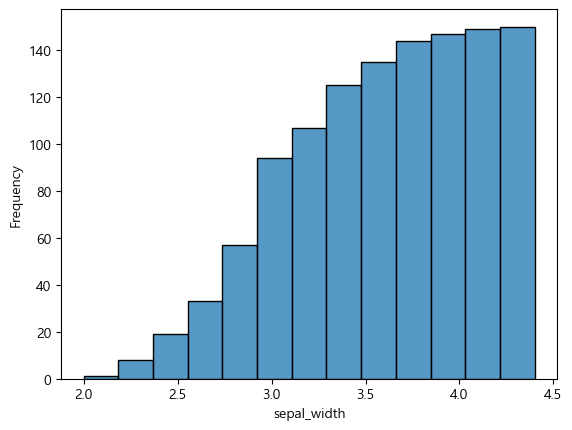

In [53]:
sns.histplot(data=iris, x='sepal_width', stat='frequency', 
             cumulative=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Percent'>

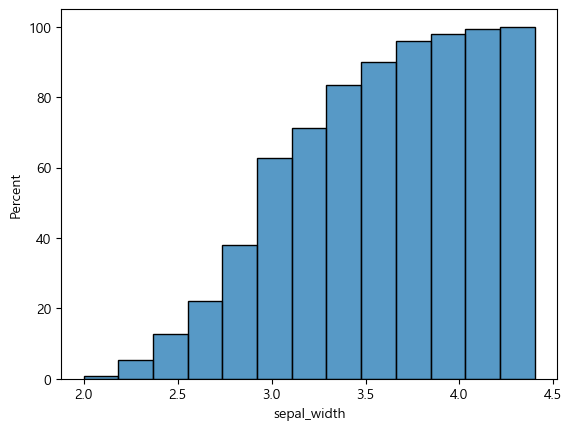

In [54]:
sns.histplot(data=iris, x='sepal_width', stat='percent', 
             cumulative=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

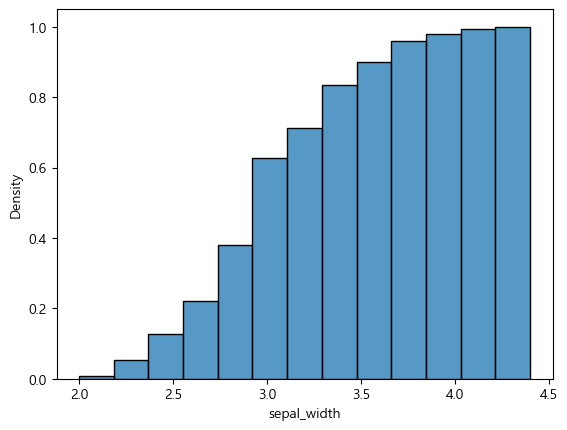

In [55]:
sns.histplot(data=iris, x='sepal_width', stat='density', 
             cumulative=True)

#### sns의 histplot()의 data인수만 지정할 경우
- 수치형 데이터들에 대한 히스토그램을 모두 그림

<AxesSubplot:ylabel='Count'>

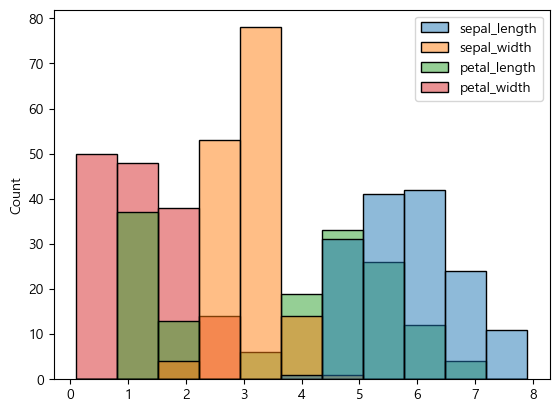

In [56]:
sns.histplot(data=iris)

<AxesSubplot:ylabel='Count'>

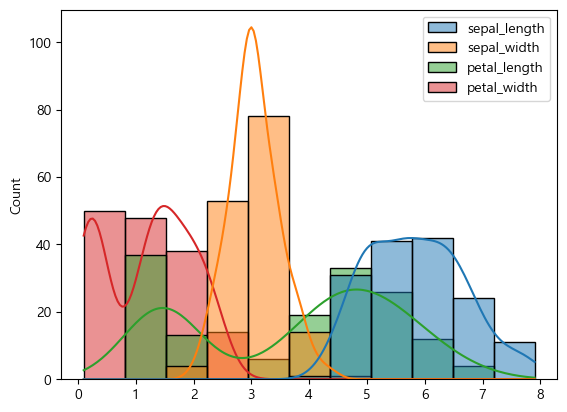

In [57]:
sns.histplot(data=iris, kde=True)

#### sns의 histplot()의 hue인수에 범주형 데이터를 지정할 경우
- 범주형 변수의 그룹별로 히스토그램을 그려 분포 비교 가능

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

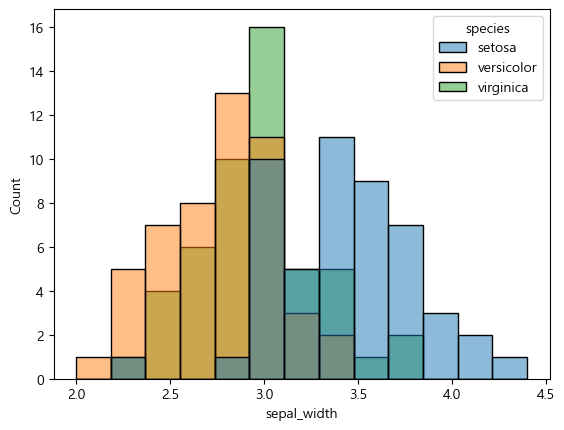

In [58]:
sns.histplot(data=iris, x='sepal_width', hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

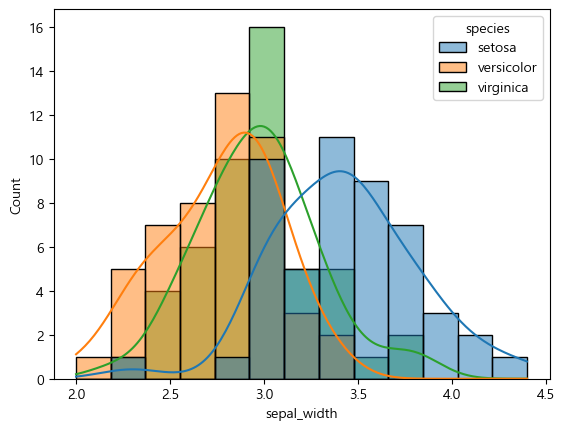

In [59]:
sns.histplot(data=iris, x='sepal_width', hue='species', kde=True)

#### sns의 histplot()의 element 인수 사용

- element = 'step' : 계단모양으로 그림  -> 분포의 윤곽 확인 용이
- element = 'poly' : 다각형으로 그림 -> 계급값끼리 이는 다각형

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

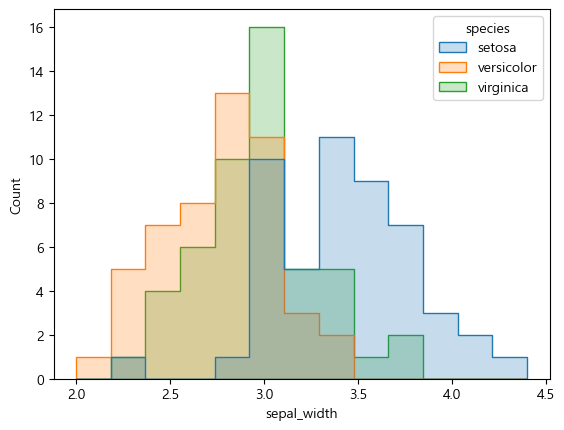

In [60]:
sns.histplot(data=iris, x='sepal_width', hue='species', element='step')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

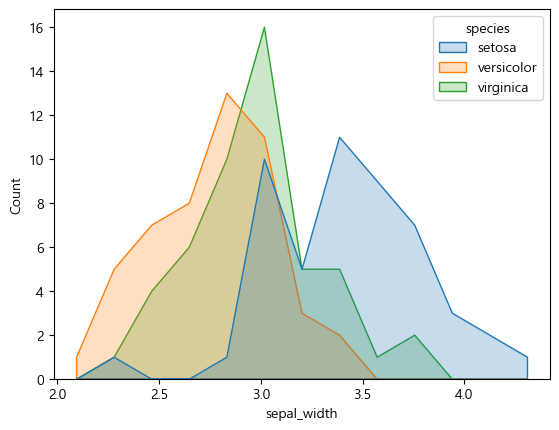

In [61]:
sns.histplot(data=iris, x='sepal_width', hue='species', element='poly')

#### sns.histplot()의 multiple인수

두 변수가 지정된 경우만 사용

- multiple='layer'
- multiple='dodge'
- multiple='stack'
- multiple='fill'

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

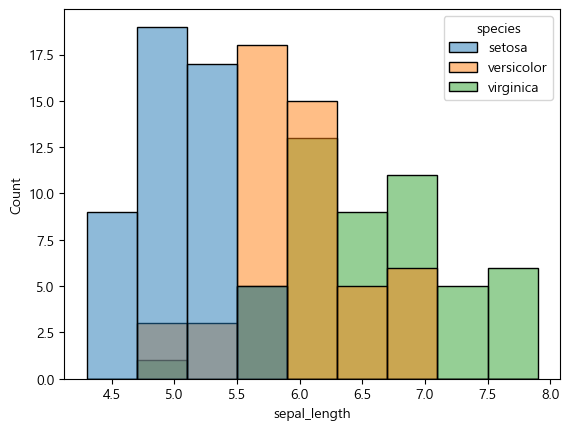

In [64]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='layer')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

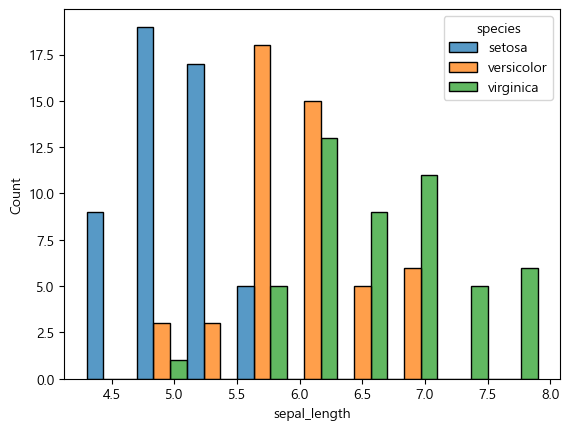

In [63]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='dodge')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

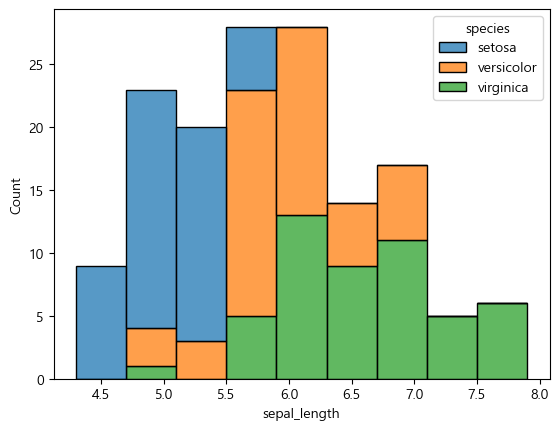

In [65]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='stack')

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

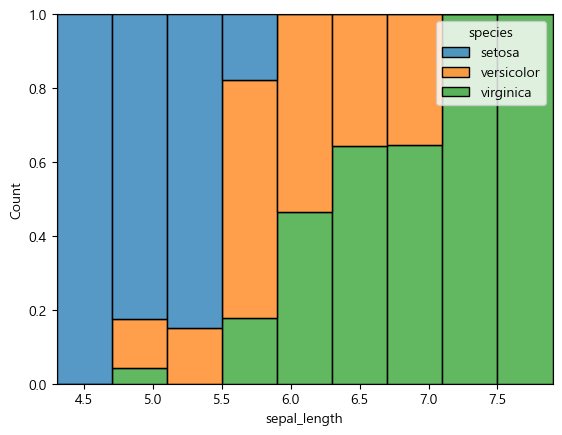

In [66]:
sns.histplot(data=iris, x='sepal_length', hue='species', multiple='fill')

### sns.displot(kind='hist',) 

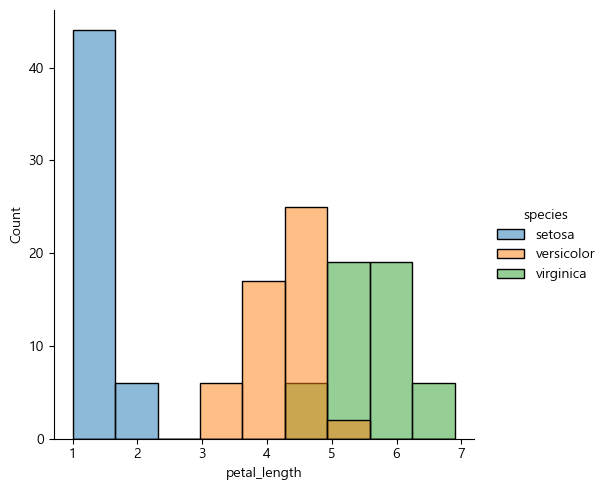

In [67]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species')

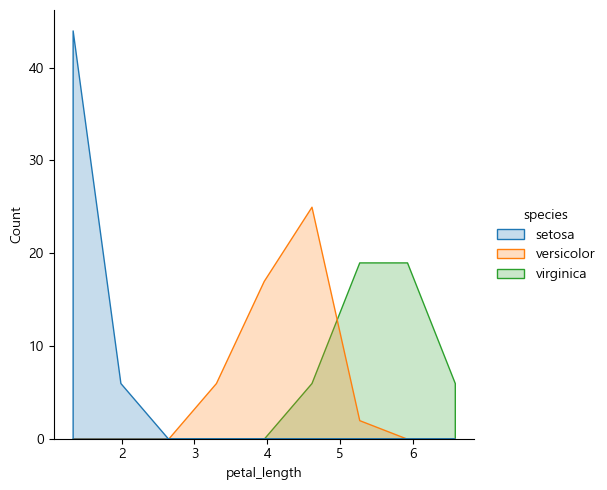

In [68]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species',
           element='poly')

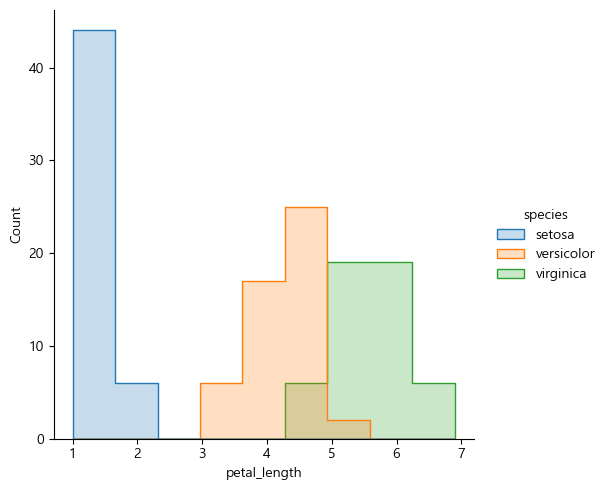

In [69]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species',
           element='step')

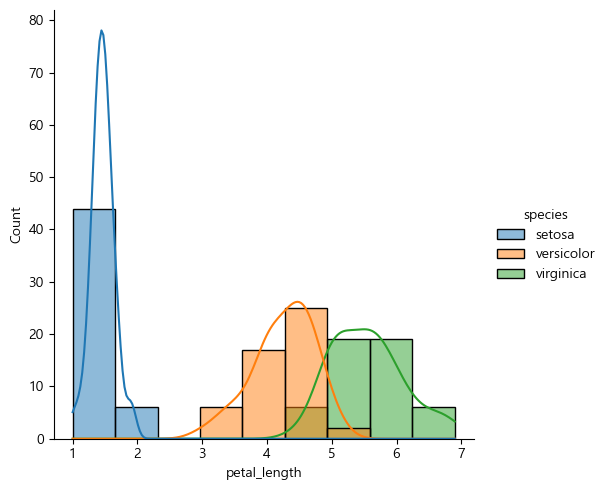

In [72]:
sns.displot(kind='hist', data=iris , x='petal_length', hue='species',
           kde=True)

### ③ pandas.DataFrame.hist()를 이용하여 히스토그램 그리기

<AxesSubplot:>

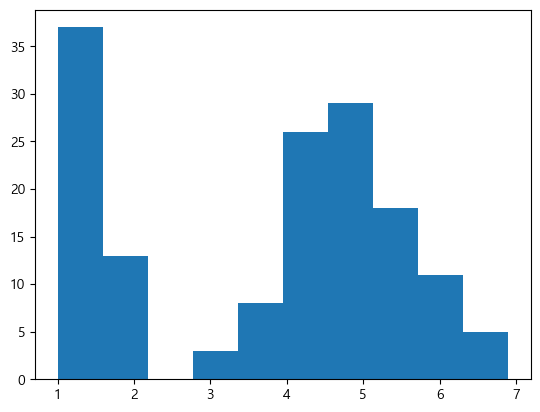

In [75]:
iris['petal_length'].hist(grid=False)

### 2) 박스플롯(boxplot)

- '상자 수염 그림'(box-and-whisker plot) 또는 '상자 그림'(box plot, boxplot)이라 부름
- 수치적 자료를 표현하는 그래프
- 자료로부터 얻어낸 통계량인 5가지 요약 수치(five-number summary)를 가지고 그린다
    - 최소값
    - 제1사분위(Q1, lower quartile)
    - 제2사분위(Q2, median)
    - 제3사분위(Q3, upper quartile)
    - 최대값
    
- 이상치 확인
- 분포의 비대칭 확인

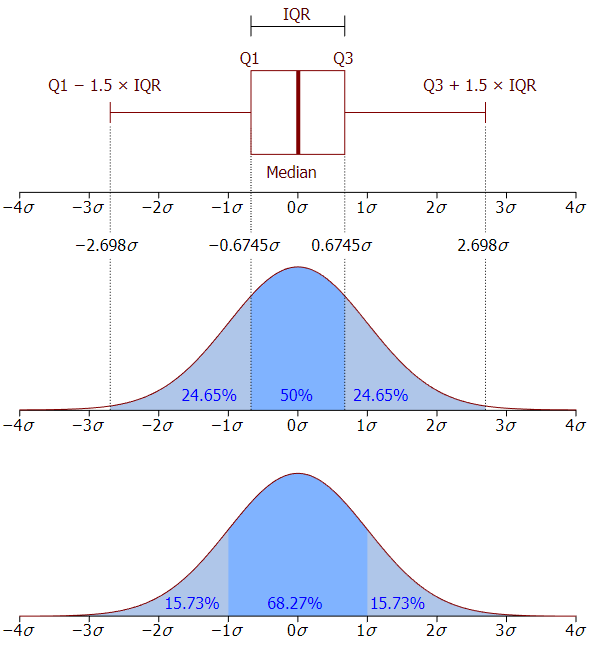

출처: https://rfriend.tistory.com/410?category=675918

### ① matplotlib.pyplot의 박스플롯 함수

- 형식 : boxplot(x, notch, sym, vert, whis, widths, ...)
- 반환값 : dict
    - boxes
    - medians
    - whiskers
    - caps
    - fliers
    - means
    
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

#### plt.xtick()을 이용하여 x축의 눈금레이블 변경

#### boxplot()의 vert=False를 사용

#### plt.boxplot()의 sym인수로 이상치를 다른 스타일로 변경

- 모양 : * 별, s 정사각형, + 십자가, . 작은점, o 큰점, d 다이아몬드 등
- 색상 : r , g, b, 

#### [문제] 4개 변수에 대한 박스플롯을 한 플롯에 그리기

---------------------------------------------

### ② seaborn의 박스플롯 함수

- 형식1.
    - boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ... )

    - 반환값 : ax (matplotlib Axes)
    
    
- 형식2.
    - catplot(kind='box', x=None, y=None, hue=None, data=None, ... )

#### sns.boxplot()의 data, x, y 인수
- x : 범주(수치)형 변수
- y : 수치(범주)형 변수
- data : x,y에 지정한 변수를 가진 데이터프레임

#### sns.boxplot()의 order인수로 박스플롯 순서 변경

#### sns.boxplot()의 orient인수로 박스플롯 방향 변경
- orient = 'h' | 'v'

### 3) 이변량 분포(bivariate distribution)

- 이변량 자료 : 두 변수로 이루어진 분포

### seaborn의 histplot()

### seaborn의 displot()

- 형식 : displot(x, y, data, ...)
- https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

-------

## 2. 데이터의 관계 파악

- 변수간 상관성(선형성) 파악
- 변수들간의 관계성 파악

- 산점도(scatter plot)
    - matplotlib.pyplot.scatter()
    - matplotlib.pyplot.plot()
    - seaborn.scatterplot()
    - seaborn.relplot(kind='scatter')
    - seaborn.regplot()
    - DataFrame.plot(kind='scatter')
    - DataFrame.plot.scatter()

- 버블플롯(bubble plot)
    - matplotlib.pyplot.scatter(, s= ,)
    - seaborn.scatterplot(, size= ,)
    - seaborn.relplot(kind='scatter', size= ,)

    
- 산점도행렬(scatterplot matrix)
    - seaborn.pariplot()
    - pandas.plotting.scatter_matrix()

### 1) 산점도(scatter plot)

- 두 변수간의 선형성 파악
- 두 변수는 수치형 데이터

### ① matplotlib.pyplot의 산점도 함수

- 형식1.
    - scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None,...)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#


- 형식2.
    - plot(x,y ,linestyle='none', marker='o',)

#### scatter()의 s, c를 이용하여 데이터포인트의 크기,색상 변경

#### 범주형 변수의 범주별 데이터를 다른 색상으로 표현한 산점도

In [ ]:
color

### maptlotlib의 plot()함수 인수 지정하여 산점도 그리기

#### plt.plot()의 marker, markersize, color등을 사용하여 산점도의 스타일 변경

### ② seaborn의 산점도 함수

- 형식1.
    - scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, ... )
    - https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

    
- 형식2.
    - relplot(kind='scatter', x=None, y=None, hue=None, size=None, data=None, ... )
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot
    
    
- 형식3.
    - regplot(x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95,...)
    - https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

### sns.scatterplot()

#### sns.scatterplot()의 hue 인수
- 범주형 변수의 범주에 따라 다른 색상으로 표시

#### sns.scatterplot()의 style 인수
- 범주형 변수의 범주에 따라 마커 모양을 다르게 표현

#### sns.scatterplot()의 s인수로 마커 크기 변경

#### scatterplot()함수의 alpha 인수를 이용하여 스타일 변경

### sns.relplot(kind='scatter')

#### sns.scatterplot()의 palette 인수

- seaborn에서 제공되는 팔레트 : https://seaborn.pydata.org/tutorial/color_palettes.html

- relplot()의 col인수

### regplot()함수를 이용하여 산점도 그리기
- 선형회귀 적합 선을 포함시키지 않으려면 fit_reg=False

- regplot()의 fit_reg=True

### ③ pandas의 plot.scatter()함수를 이용하여 산점도 그리기

### 2) 산점도 행렬(scatter plot matrix) 그리기

- 여러 개의 연속형 변수에 대해서 두 변수씩 쌍을 이루는 산점도를 그려 한꺼번에 변수 간 관계를 일목요연하게 볼 수 있음

###  ① seaborn.pairplot()을 이용한 산점도 행렬

- 형식 : pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


- https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

#### pairplot()의 인수를 이용한 산점도 행렬1
- diag_kind='hist'를 설정하여 대각원소 자리에 각 변수별 히스토그램 그리기

#### pairplot()의 인수를 이용한 산점도 행렬2
- diag_kind='kde' : 각 변수별 커널밀도추정곡선 그림
- hue='species' : 'species'(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
- 색깔은 palette 에 'bright', 'pastel', 'deep', 'muted', 'colorblind', 'dark' 중에서 가독성이 좋고 선호하는 색상으로 선택 

### ② pandas.plotting 의 scatter_matrix() 함수를 사용하여 산점도 행렬

- 형식 : scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)


- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

### 3) 버블 플롯

- 산점도에서 x, y이외의 다른 변수를 포인트의 크기로 매핑하여 변수들간의 관계를 파악하게 함

### ① matplotlib.pyplot의 scatter()를 이용한 버블플롯 

- scatter()의 s 인수 사용

### ② seaborn의 산점도 함수를 이용한 버블 플롯

- sns.scatterplot() 또는 relplot()의 size인수 사용

-----

## 3. 집단 간 비교

: 그룹별 데이터 분포 비교
- FacetGrid를 이용한 범주형 플롯 시각화
    

- 막대그래프(barplot)
    - matplotlib.pyplot.bar()
    - matplotlib.pyplot.barh()
    - DataFrame.plot(kind='bar'|'barh')
    - DataFrame.plot.bar()
    - DataFrame.plot.barh()
    - seaborn.barplot()
    - seaborn.catplot(kind='bar')


- 바이올린플롯(violin plot)
    - matplotlib.pyplot.violinplot()
    - seaborn.viloinplot()
    - seaborn.catplot(kind='violin')


- strip plot
    - seaborn.stripplot()
    - seaborn.catplot(kind='strip')
    
- swarm plot
    - seaborn.swarmplot()
    - seaborn.catplot(kind='swarm')

### 1) 막대 그래프(barplot)

- 범주형 데이터의 범주별 빈도 비교

### ① matplotlib.pyplot의 막대그래프 함수

- 형식1
    - bar(x, height, width=0.8, bottom=None, align='center', data=None,...)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    
    
- 형식2
    - barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

### ② seaborn의 막대그래프 함수

- 형식1
    - barplot(x=None, y=None, hue=None, data=None, order=None, orient='v'|'h', dodge=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
    
    
- 형식2
    - catplot(kind='bar', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.barplot()

- 누적막대그래프(stacked bar chart)

### sns.catplot(kind='bar')

#### catplot()의 col인수
- 윈도우에 범주별 막대그래프를 따로 표현

### 2) 바이올린 플롯

- 박스플롯의 기능과 함께 데이터의 커널밀도곡선을 제시
- 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
- 더 실제에 가까운 분포를 알 수 있음

### ① matplotlib.pyplot의 바이올린 플롯 함수

- 형식
    - violinplot(dataset, positions=None, vert=True, widths=0.5,  *, data=None)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

### ② seaborn의 바이올린 플롯 함수

- 형식1
    - violinplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
    
    
- 형식2
    - catplot(kind='violin', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.violinplot()

### sns.catplot(kind='violin')

### 3) Strip plot

- 겹치는 데이터를 파악할 수 있도록 같은 값에 jitter를 통해 겹치지 않게 그려주는 그래프

### seaborn의 strip plot 함수

- 형식1
    - stripplot(x=None, y=None, hue=None, data=None, order=None, jitter=True, ...)
    - https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot
    
    
- 형식2
    - catplot(kind='strip', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

### sns.stripplot()

### sns.catplot('kind='strip')

### 4) Swarm plot

- 데이터의 분산까지 고려하여 겹치는 데이터를 겹치지 않게 그려주는 그래프
- 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

### seaborn의 swarm plot 함수

- 형식1
    - swarmplot(x=None, y=None, hue=None, data=None, order=None, ...)
    - https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot
    
    
- 형식2
    - catplot(kind='swarm', x=None, y=None, hue=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

#### box plot과 swarmplot을 같이 표시

------

## 4. 시간에 따라 변화하는 데이터 표현

- 시계열 데이터 시각화
- 시간에 따른 추세 파악
- 선그래프(line plot)
    - matplotlib.pyplot.plot()
    - seaborn.lineplot()
    - seaborn.relplot(kind='line')
    - DataFrame.plot(kind='line')
    - DataFrame.plot.line()

### 예제 데이터

### 1) matplotlib의 plot()을 이용하여 라인플롯 그리기

- 형식 : plot(x, y, fmt, ..., data=None, scalex=True, scaley=True, **kwargs)
    - x, y : array-like or scalar
    - fmt : str, optional
 

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#

#### plot()의 data 인수
- indexable object : If given, provide the label names to plot in x and y.

#### plot()의 fmt인수

- 색상과 마커 모양, 선의 모양 등을 약어로 지정
- 예. 'ro' : color='red', marker='circle', linestyle='solid'

### 2) seaborn의 선그래프 함수 이용

- 형식1.
    - lineplot(* , x=None, y=None, hue=None, size=None, style=None, data=None, palette=None,...)
    - https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
    
    
- 형식2.
    - relplot(kind='line', x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None,...)
    - https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

### sns.lineplot()

#### seaborn의 set_style() 이용하여 라인플롯 그리기

**sns.despine() 함수를 이용한 그림 테두리 제거**

: sns.despine(right=True,left=True,top=False,bottom=False)

### 3) pandas.DataFrame.plot(kind='line') 이용

------------------------------------------------

## 5. 히트맵(heatmap)

### (1) seaborn의 heatmap() 함수 사용

- 범주형-범주형-수치형 자료의 시각화
    - X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료의 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화


- 형식 : heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)


- https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

### 예제 데이터1.
- 캐글 자전거수요예측 데이터
- https://www.kaggle.com/competitions/bike-sharing-demand

- datetime : hourly date + timestamp (날짜와 시간)

- season : 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)

- holiday : whether the day is considered a holiday (휴일)

- workingday ; whether the day is neither a weekend nor holiday (평일)

- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)

- temp : temperature in Celsius (온도)

- atemp : “feels like” temperature in Celsius (체감 온도)

- humidity : relative humidity (상대 습도)

- windspeed : wind speed (풍속)

- casual : number of non-registered user rentals initiated (비회원 대여량)

- registered : number of registered user rentals initiated (회원 대여량)

- count : number of total rentals (총 대여량)

#### sns.heatmap() 사용하여 계절(season)과 시간대별(hours) 자전거  총대여량 시각화

#### 데이터 피봇팅

- pivot() 함수
    - 형식1. pd.pivot(data, index=None, columns=None, values=None)
    - 형식2. 데이터프레임.pivot(index=None, columns=None, values=None)
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
    
    
- pivot_table() 함수
    - 형식1. pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) 
    - 형식2. 데이터프레임.pivot_table( )
    - https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

- heatmap()의 색상 스케일 최소값(vmin), 최대값(vmax) 인수 사용

#### heatmap()의 annot, fmt 인수
- annot=True : 히트맵의 각 셀에 값 표시
- fmt='d' or 'f' : 히트맵에 표시하는 값의 서식(format) 지정 (정수, 실수)

#### sns.heatmap()함수의 cmap인수 사용하여 다른 color map 지정

- color maps in Matplotlib 링크 참고: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

### (2) matplotlib의 pcolor()를 이용한 heatmap 그리기

------------------------------------------

### 예제 데이터2
- seaborn 패키지의 flights dataset

**heatmap을 그리기 위한 데이터 테이블 생성**
- pivot 테이블을 이용해서 연도별 각 월 승객수로 구조를 변환

**seaborn.heatmap() 그리기**

----------------------------------------------------